In [2]:
import pandas as pd

In [132]:
rank = pd.read_csv('rank_df.csv')
bus = pd.read_csv('venues_neighborid.csv')

In [133]:
rank.head()

,Unnamed: 0,Unnamed: 0.1,neighborhood,lat,lng,Manhattan,competitors,rating,review_count,rent,unsupervised_score,price,half-mile_sub_count,competitors_rank,half-mile_sub_count_rank,rent_rank,price_rank,unsupervised_score_rank,review_count_rank,rating_rank
0,2,2,2,40.774802,-73.959325,1,0.980392,0.766667,0.330335,0.715101,0.033941,0.240000,0.224490,16,30,22,32,42,43,43
1,6,6,6,40.724874,-73.995243,1,0.960784,0.833333,0.377477,0.625787,0.058375,0.100000,0.438776,28,43,23,33,34,10,45
2,13,13,13,40.821264,-73.953571,1,0.941176,0.793651,0.030270,0.923605,0.026746,0.600000,0.204082,9,26,28,2,33,21,25
3,15,15,15,40.756320,-73.983807,1,0.941176,0.765432,0.335535,0.745986,0.034413,0.377778,1.000000,39,8,9,18,21,35,10
4,29,29,29,40.706195,-74.012400,1,0.960784,0.688889,0.122409,0.777625,0.032687,0.400000,0.806122,37,35,8,13,24,34,24


In [134]:
bus.head()

,Unnamed: 0,userId,venueId,venueCategoryId,venueCategory,latitude,longitude,neighborhood_id
0,0,470,49bbd6c0f964a520f4531fe3,4bf58dd8d48988d127951735,Arts & Crafts Store,40.719810,-74.002581,220
1,1,979,4a43c0aef964a520c6a61fe3,4bf58dd8d48988d1df941735,Bridge,40.606800,-74.044170,104
2,2,69,4c5cc7b485a1e21e00d35711,4bf58dd8d48988d103941735,Home (private),40.716162,-73.883070,228
3,3,395,4bc7086715a7ef3bef9878da,4bf58dd8d48988d104941735,Medical Center,40.745164,-73.982519,264
4,4,87,4cf2c5321d18a143951b5cec,4bf58dd8d48988d1cb941735,Food Truck,40.740104,-73.989658,75


In [135]:
rank = rank.drop(['lat','lng'], axis = 1)

In [136]:
final_venues_with_rank = bus.merge(rank, left_on='neighborhood_id', right_on='neighborhood', how='left')

In [137]:
final_venues_with_rank.head()

,Unnamed: 0_x,userId,venueId,venueCategoryId,venueCategory,latitude,longitude,neighborhood_id,Unnamed: 0_y,Unnamed: 0.1,...,unsupervised_score,price,half-mile_sub_count,competitors_rank,half-mile_sub_count_rank,rent_rank,price_rank,unsupervised_score_rank,review_count_rank,rating_rank
0,0,470,49bbd6c0f964a520f4531fe3,4bf58dd8d48988d127951735,Arts & Crafts Store,40.719810,-74.002581,220,220.0,220.0,...,0.017177,0.0,0.632653,1.0,46.0,36.0,28.0,39.0,1.0,18.0
1,1,979,4a43c0aef964a520c6a61fe3,4bf58dd8d48988d1df941735,Bridge,40.606800,-74.044170,104,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,69,4c5cc7b485a1e21e00d35711,4bf58dd8d48988d103941735,Home (private),40.716162,-73.883070,228,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,395,4bc7086715a7ef3bef9878da,4bf58dd8d48988d104941735,Medical Center,40.745164,-73.982519,264,264.0,264.0,...,0.065095,0.4,0.459184,24.0,45.0,43.0,25.0,46.0,32.0,16.0
4,4,87,4cf2c5321d18a143951b5cec,4bf58dd8d48988d1cb941735,Food Truck,40.740104,-73.989658,75,75.0,75.0,...,0.035681,0.2,0.867347,18.0,21.0,13.0,38.0,5.0,47.0,30.0


In [146]:
final_venues_with_rank.shape

(38333, 26)

In [147]:
final_venues_with_rank.columns.values

array(['Unnamed: 0_x', 'userId', 'venueId', 'venueCategoryId',
       'venueCategory', 'latitude', 'longitude', 'neighborhood_id',
       'Unnamed: 0_y', 'Unnamed: 0.1', 'neighborhood', 'Manhattan',
       'competitors', 'rating', 'review_count', 'rent',
       'unsupervised_score', 'price', 'half-mile_sub_count',
       'competitors_rank', 'half-mile_sub_count_rank', 'rent_rank',
       'price_rank', 'unsupervised_score_rank', 'review_count_rank',
       'rating_rank'], dtype=object)

In [140]:
# final_venues_with_rank = final_venues_with_rank.drop(['Unnamed: 0_x','Unnamed: 0_y', 'Unnamed: 0.1'], axis = 1)

In [141]:
final_venues_with_rank.head()

,Unnamed: 0_x,userId,venueId,venueCategoryId,venueCategory,latitude,longitude,neighborhood_id,Unnamed: 0_y,Unnamed: 0.1,...,unsupervised_score,price,half-mile_sub_count,competitors_rank,half-mile_sub_count_rank,rent_rank,price_rank,unsupervised_score_rank,review_count_rank,rating_rank
0,0,470,49bbd6c0f964a520f4531fe3,4bf58dd8d48988d127951735,Arts & Crafts Store,40.719810,-74.002581,220,220.0,220.0,...,0.017177,0.0,0.632653,1.0,46.0,36.0,28.0,39.0,1.0,18.0
1,1,979,4a43c0aef964a520c6a61fe3,4bf58dd8d48988d1df941735,Bridge,40.606800,-74.044170,104,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,69,4c5cc7b485a1e21e00d35711,4bf58dd8d48988d103941735,Home (private),40.716162,-73.883070,228,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,395,4bc7086715a7ef3bef9878da,4bf58dd8d48988d104941735,Medical Center,40.745164,-73.982519,264,264.0,264.0,...,0.065095,0.4,0.459184,24.0,45.0,43.0,25.0,46.0,32.0,16.0
4,4,87,4cf2c5321d18a143951b5cec,4bf58dd8d48988d1cb941735,Food Truck,40.740104,-73.989658,75,75.0,75.0,...,0.035681,0.2,0.867347,18.0,21.0,13.0,38.0,5.0,47.0,30.0


In [238]:
fi = final_venues_with_rank.loc[final_venues_with_rank['Manhattan'] == 1,]

In [239]:
fi.shape

(17138, 26)

In [240]:
fi.to_csv('final_venues_with_rank.csv')

In [241]:
fi.head()

,Unnamed: 0_x,userId,venueId,venueCategoryId,venueCategory,latitude,longitude,neighborhood_id,Unnamed: 0_y,Unnamed: 0.1,...,unsupervised_score,price,half-mile_sub_count,competitors_rank,half-mile_sub_count_rank,rent_rank,price_rank,unsupervised_score_rank,review_count_rank,rating_rank
0,0,470,49bbd6c0f964a520f4531fe3,4bf58dd8d48988d127951735,Arts & Crafts Store,40.719810,-74.002581,220,220.0,220.0,...,0.017177,0.000000,0.632653,1.0,46.0,36.0,28.0,39.0,1.0,18.0
3,3,395,4bc7086715a7ef3bef9878da,4bf58dd8d48988d104941735,Medical Center,40.745164,-73.982519,264,264.0,264.0,...,0.065095,0.400000,0.459184,24.0,45.0,43.0,25.0,46.0,32.0,16.0
4,4,87,4cf2c5321d18a143951b5cec,4bf58dd8d48988d1cb941735,Food Truck,40.740104,-73.989658,75,75.0,75.0,...,0.035681,0.200000,0.867347,18.0,21.0,13.0,38.0,5.0,47.0,30.0
6,6,642,4ab966c3f964a5203c7f20e3,4bf58dd8d48988d1e0931735,Coffee Shop,40.751591,-73.974121,62,62.0,62.0,...,0.055866,0.353846,0.520408,40.0,39.0,11.0,9.0,14.0,8.0,21.0
7,7,292,4d0cc47f903d37041864bf55,4bf58dd8d48988d12b951735,Bus Station,40.779422,-73.955341,261,261.0,261.0,...,0.073641,0.368421,0.163265,32.0,5.0,19.0,35.0,10.0,9.0,34.0


In [17]:
k = pd.read_csv('venue_neighborhoods_Manhattan.csv')

In [18]:
k.head()

,Unnamed: 0,Unnamed: 0.1,userId,venueId,venueCategoryId,venueCategory,latitude,longitude,neighborhood_id,Manhattan
0,0,0,470,49bbd6c0f964a520f4531fe3,4bf58dd8d48988d127951735,Arts & Crafts Store,40.719810,-74.002581,220,1
1,1,1,979,4a43c0aef964a520c6a61fe3,4bf58dd8d48988d1df941735,Bridge,40.606800,-74.044170,104,0
2,2,2,69,4c5cc7b485a1e21e00d35711,4bf58dd8d48988d103941735,Home (private),40.716162,-73.883070,228,0
3,3,3,395,4bc7086715a7ef3bef9878da,4bf58dd8d48988d104941735,Medical Center,40.745164,-73.982519,264,1
4,4,4,87,4cf2c5321d18a143951b5cec,4bf58dd8d48988d1cb941735,Food Truck,40.740104,-73.989658,75,1


In [19]:
k = k.loc[k['Manhattan'] == 1,]

In [20]:
k.shape

(17138, 10)

###  Plotting unsupervised scores against each of the factors

In [279]:
import pandas as pd

In [280]:
df = pd.read_csv('scoring_df_final.csv')

In [281]:
df.shape

(300, 12)

In [282]:
df.head()

,Unnamed: 0,neighborhood,lat,lng,Manhattan,competitors,rating,review_count,rent,unsupervised_score,price,half-mile_sub_count
0,0,0,40.765887,-74.165511,0,0.980392,0.000000,0.000000,0.818188,0.063832,1.00,0.000000
1,1,1,40.662722,-73.908039,0,0.980392,0.000000,0.000000,0.885175,0.262769,1.00,0.091837
2,2,2,40.774802,-73.959325,1,0.980392,0.766667,0.330335,0.715101,0.033941,0.24,0.224490
3,3,3,40.785104,-73.794881,0,0.980392,0.000000,0.000000,0.891074,0.048555,1.00,0.000000
4,4,4,40.936005,-74.063185,0,1.000000,0.000000,0.000000,0.761531,0.024103,1.00,0.000000


In [283]:
df.describe()

,Unnamed: 0,neighborhood,lat,lng,Manhattan,competitors,rating,review_count,rent,unsupervised_score,price,half-mile_sub_count
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,149.500000,149.500000,40.764057,-73.978337,0.156667,0.970523,0.221326,0.052708,0.851250,0.087555,0.839502,0.094422
std,86.746758,86.746758,0.095302,0.130657,0.364094,0.072882,0.355269,0.128573,0.103880,0.111943,0.269801,0.189813
min,0.000000,0.000000,40.559865,-74.257021,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.750000,74.750000,40.702182,-74.069863,0.000000,0.960784,0.000000,0.000000,0.826121,0.034309,0.600000,0.000000
50%,149.500000,149.500000,40.754267,-73.977200,0.000000,0.980392,0.000000,0.000000,0.871186,0.058440,1.000000,0.000000
75%,224.250000,224.250000,40.836980,-73.890067,0.000000,1.000000,0.688889,0.029544,0.916117,0.097771,1.000000,0.112245
max,299.000000,299.000000,40.977362,-73.697022,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [284]:
df_old = pd.read_csv('scoring_df.csv')

In [285]:
df_old.head()

,Unnamed: 0,neighborhood,lat,lng,subway,competitors,rating,review_count,price,rent,half-mile_sub_count,unsupervised_score
0,0,0,40.765887,-74.165511,0,1,0.00,0.0,0.0,59.722800,0,0.004134
1,1,1,40.662722,-73.908039,10,1,0.00,0.0,0.0,40.481853,9,0.017018
2,2,2,40.774802,-73.959325,8,1,3.45,216.7,1.9,89.332939,22,0.002198
3,3,3,40.785104,-73.794881,0,1,0.00,0.0,0.0,38.787253,0,0.003145
4,4,4,40.936005,-74.063185,0,0,0.00,0.0,0.0,75.996667,0,0.001561


In [286]:
df_old.describe()

,Unnamed: 0,neighborhood,lat,lng,subway,competitors,rating,review_count,price,rent,half-mile_sub_count,unsupervised_score
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,149.500000,149.500000,40.764057,-73.978337,6.426667,1.503333,0.995969,34.576492,0.401246,50.226240,9.253333,0.005670
std,86.746758,86.746758,0.095302,0.130657,9.404935,3.716994,1.598711,84.343820,0.674502,29.837998,18.601682,0.007250
min,0.000000,0.000000,40.559865,-74.257021,0.000000,0.000000,0.000000,0.000000,0.000000,7.500000,0.000000,0.000000
25%,74.750000,74.750000,40.702182,-74.069863,0.000000,0.000000,0.000000,0.000000,0.000000,31.594167,0.000000,0.002222
50%,149.500000,149.500000,40.754267,-73.977200,0.000000,1.000000,0.000000,0.000000,0.000000,44.500000,0.000000,0.003785
75%,224.250000,224.250000,40.836980,-73.890067,11.000000,2.000000,3.100000,19.380952,1.000000,57.444167,11.000000,0.006332
max,299.000000,299.000000,40.977362,-73.697022,54.000000,51.000000,4.500000,656.000000,2.500000,294.735000,98.000000,0.064764


In [287]:
## use df_old for making histograms and scatterplots

In [288]:
%matplotlib inline

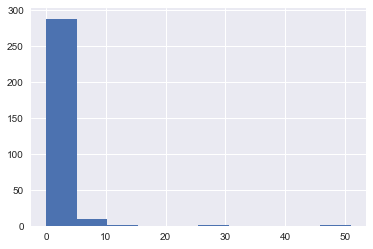

In [289]:
df_old['competitors'].hist()

In [290]:
df_old['comp_bin'] = pd.cut(df_old['competitors'], [0,5,10,15,20,max(df_old['competitors']) + 1], labels = [1,2,3,4,5])

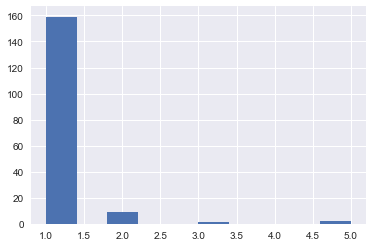

In [291]:
df_old['comp_bin'].hist()

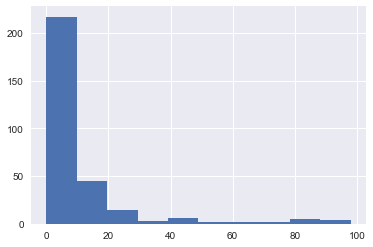

In [292]:
df_old['half-mile_sub_count'].hist()

In [293]:
import matplotlib.pyplot as plt

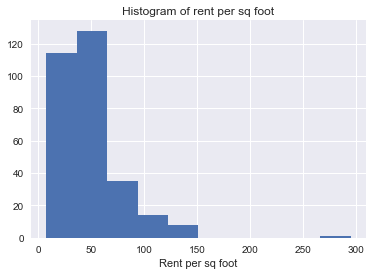

In [294]:
df_old['rent'].hist()
plt.title('Histogram of rent per sq foot')
plt.xlabel('Rent per sq foot')

In [295]:
df_old['n_rent'] = pd.cut(df_old['rent'], [0,25,50,75,100,125,150,max(df_old['rent'])+1], labels = ['0-25','25-50','50-75','75-100','100-125','125-150','150+'])

In [296]:
d = df_old[['n_rent','rent']].groupby(['n_rent']).agg(['count'])


In [297]:
d.reset_index()

,n_rent,rent
,,count
0,0-25,35
1,25-50,160
2,50-75,57
3,75-100,26
4,100-125,15
5,125-150,6
6,150+,1


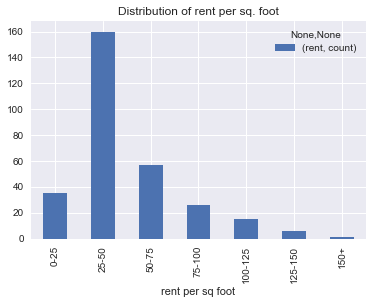

In [298]:
d.plot(kind = 'bar')
plt.xlabel('rent per sq foot')
plt.title('Distribution of rent per sq. foot')

In [299]:
###Scatter plots

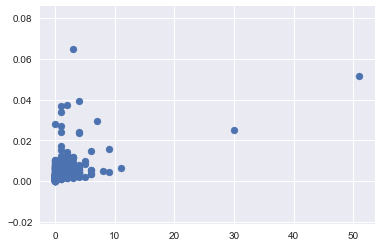

In [300]:
plt.scatter(df_old['competitors'],df_old['unsupervised_score'])

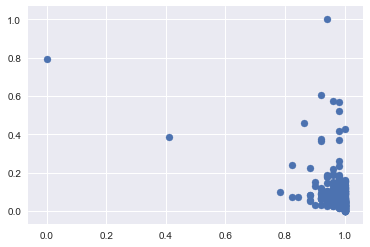

In [301]:
plt.scatter(df['competitors'],df['unsupervised_score'])

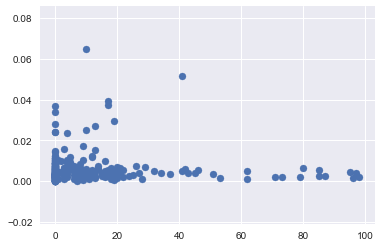

In [302]:
plt.scatter(df_old['half-mile_sub_count'],df_old['unsupervised_score'])

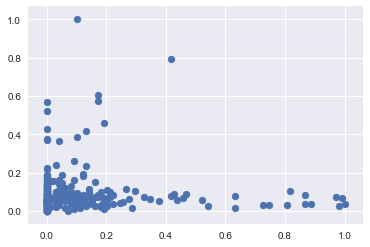

In [303]:
plt.scatter(df['half-mile_sub_count'],df['unsupervised_score'])

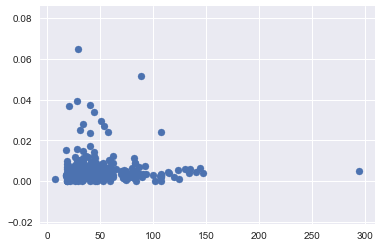

In [304]:
plt.scatter(df_old['rent'],df_old['unsupervised_score'])

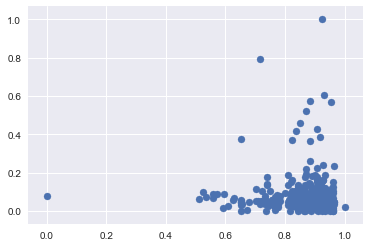

In [305]:
plt.scatter(df['rent'],df['unsupervised_score'])

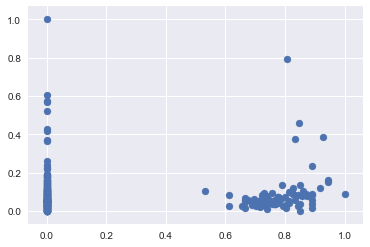

In [306]:
plt.scatter(df['rating'],df['unsupervised_score'])

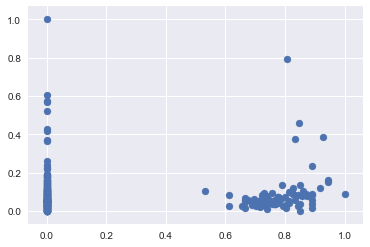

In [307]:
plt.scatter(df['rating'],df['unsupervised_score'])

## Analysis for Manhattan

In [308]:
df.head()

,Unnamed: 0,neighborhood,lat,lng,Manhattan,competitors,rating,review_count,rent,unsupervised_score,price,half-mile_sub_count
0,0,0,40.765887,-74.165511,0,0.980392,0.000000,0.000000,0.818188,0.063832,1.00,0.000000
1,1,1,40.662722,-73.908039,0,0.980392,0.000000,0.000000,0.885175,0.262769,1.00,0.091837
2,2,2,40.774802,-73.959325,1,0.980392,0.766667,0.330335,0.715101,0.033941,0.24,0.224490
3,3,3,40.785104,-73.794881,0,0.980392,0.000000,0.000000,0.891074,0.048555,1.00,0.000000
4,4,4,40.936005,-74.063185,0,1.000000,0.000000,0.000000,0.761531,0.024103,1.00,0.000000


In [309]:
df_old.head()

,Unnamed: 0,neighborhood,lat,lng,subway,competitors,rating,review_count,price,rent,half-mile_sub_count,unsupervised_score,comp_bin,n_rent
0,0,0,40.765887,-74.165511,0,1,0.00,0.0,0.0,59.722800,0,0.004134,1.0,50-75
1,1,1,40.662722,-73.908039,10,1,0.00,0.0,0.0,40.481853,9,0.017018,1.0,25-50
2,2,2,40.774802,-73.959325,8,1,3.45,216.7,1.9,89.332939,22,0.002198,1.0,75-100
3,3,3,40.785104,-73.794881,0,1,0.00,0.0,0.0,38.787253,0,0.003145,1.0,25-50
4,4,4,40.936005,-74.063185,0,0,0.00,0.0,0.0,75.996667,0,0.001561,NaN,75-100


In [310]:
df_m = df.loc[df['Manhattan'] == 1,]

In [311]:
df_m.shape

(47, 12)

In [313]:
df_old_m = df_m[['neighborhood','Manhattan']].merge(df_old, left_on='neighborhood', right_on='neighborhood', how='left')

In [314]:
df_old_m.shape

(47, 15)

In [173]:
df_old_m.head()

,neighborhood,Manhattan,Unnamed: 0,lat,lng,subway,competitors,rating,review_count,price,rent,half-mile_sub_count,unsupervised_score
0,2,1,2,40.774802,-73.959325,8,1,3.450000,216.700000,1.900000,89.332939,22,0.002198
1,6,1,6,40.724874,-73.995243,22,2,3.750000,247.625000,2.250000,114.987197,43,0.003781
2,13,1,13,40.821264,-73.953571,17,3,3.571429,19.857143,1.000000,29.443333,20,0.001732
3,15,1,15,40.756320,-73.983807,42,3,3.444444,220.111111,1.555556,80.461588,98,0.002229
4,29,1,29,40.706195,-74.012400,54,2,3.100000,80.300000,1.500000,71.373877,79,0.002117


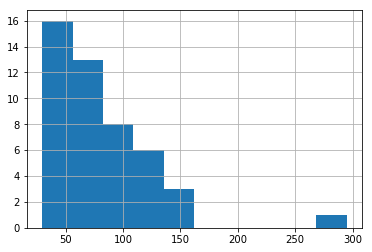

In [82]:
df_old_m['rent'].hist()

In [88]:
min(df_old_m['rent'])

29.443333333333307

In [89]:
df_old_m['n_rent'] = pd.cut(df_old_m['rent'], [0,50,75,100,125,150,max(df_old['rent'])+1], labels = ['25-50','50-75','75-100','100-125','125-150','150+'])

In [90]:
d = df_old_m[['n_rent','rent']].groupby(['n_rent']).agg(['count'])


In [91]:
d.reset_index()

,n_rent,rent
,,count
0,25-50,14
1,50-75,11
2,75-100,9
3,100-125,6
4,125-150,6
5,150+,1


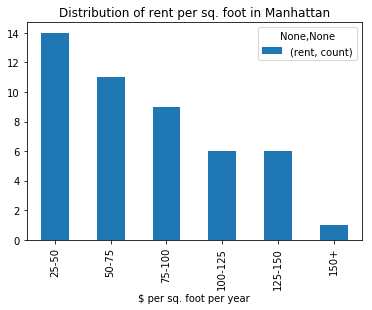

In [119]:
d.plot(kind = 'bar')
plt.title('Distribution of rent per sq. foot in Manhattan')
plt.xlabel('$ per sq. foot per year')

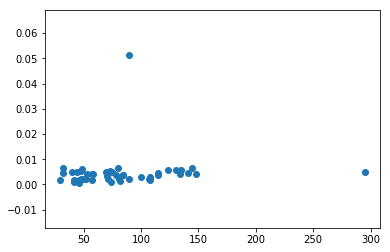

In [96]:
plt.scatter(df_old_m['rent'],df_old_m['unsupervised_score'])

In [104]:
rank = pd.read_csv('rank_df.csv')

In [105]:
rank.head()

,Unnamed: 0,Unnamed: 0.1,neighborhood,lat,lng,Manhattan,competitors,rating,review_count,rent,unsupervised_score,price,half-mile_sub_count,competitors_rank,half-mile_sub_count_rank,rent_rank,price_rank,unsupervised_score_rank,review_count_rank,rating_rank
0,2,2,2,40.774802,-73.959325,1,0.980392,0.766667,0.330335,0.715101,0.033941,0.240000,0.224490,16,30,22,32,42,43,43
1,6,6,6,40.724874,-73.995243,1,0.960784,0.833333,0.377477,0.625787,0.058375,0.100000,0.438776,28,43,23,33,34,10,45
2,13,13,13,40.821264,-73.953571,1,0.941176,0.793651,0.030270,0.923605,0.026746,0.600000,0.204082,9,26,28,2,33,21,25
3,15,15,15,40.756320,-73.983807,1,0.941176,0.765432,0.335535,0.745986,0.034413,0.377778,1.000000,39,8,9,18,21,35,10
4,29,29,29,40.706195,-74.012400,1,0.960784,0.688889,0.122409,0.777625,0.032687,0.400000,0.806122,37,35,8,13,24,34,24


In [174]:
f = pd.read_csv('scoring_df_final.csv')

In [175]:
f.head()

,Unnamed: 0,neighborhood,lat,lng,Manhattan,competitors,rating,review_count,rent,unsupervised_score,price,half-mile_sub_count
0,0,0,40.765887,-74.165511,0,0.980392,0.000000,0.000000,0.818188,0.063832,1.00,0.000000
1,1,1,40.662722,-73.908039,0,0.980392,0.000000,0.000000,0.885175,0.262769,1.00,0.091837
2,2,2,40.774802,-73.959325,1,0.980392,0.766667,0.330335,0.715101,0.033941,0.24,0.224490
3,3,3,40.785104,-73.794881,0,0.980392,0.000000,0.000000,0.891074,0.048555,1.00,0.000000
4,4,4,40.936005,-74.063185,0,1.000000,0.000000,0.000000,0.761531,0.024103,1.00,0.000000


In [176]:
df_old_m.head()

,neighborhood,Manhattan,Unnamed: 0,lat,lng,subway,competitors,rating,review_count,price,rent,half-mile_sub_count,unsupervised_score
0,2,1,2,40.774802,-73.959325,8,1,3.450000,216.700000,1.900000,89.332939,22,0.002198
1,6,1,6,40.724874,-73.995243,22,2,3.750000,247.625000,2.250000,114.987197,43,0.003781
2,13,1,13,40.821264,-73.953571,17,3,3.571429,19.857143,1.000000,29.443333,20,0.001732
3,15,1,15,40.756320,-73.983807,42,3,3.444444,220.111111,1.555556,80.461588,98,0.002229
4,29,1,29,40.706195,-74.012400,54,2,3.100000,80.300000,1.500000,71.373877,79,0.002117


In [177]:
f['new_score'] = f['unsupervised_score']

In [ ]:
df_old = pd.read_csv('scoring_df.csv')


In [178]:
df_old_m = df_old_m.merge(f[['neighborhood','new_score']], left_on='neighborhood',right_on= 'neighborhood', how = 'left')

In [179]:
df_old_m.head()

,neighborhood,Manhattan,Unnamed: 0,lat,lng,subway,competitors,rating,review_count,price,rent,half-mile_sub_count,unsupervised_score,new_score
0,2,1,2,40.774802,-73.959325,8,1,3.450000,216.700000,1.900000,89.332939,22,0.002198,0.033941
1,6,1,6,40.724874,-73.995243,22,2,3.750000,247.625000,2.250000,114.987197,43,0.003781,0.058375
2,13,1,13,40.821264,-73.953571,17,3,3.571429,19.857143,1.000000,29.443333,20,0.001732,0.026746
3,15,1,15,40.756320,-73.983807,42,3,3.444444,220.111111,1.555556,80.461588,98,0.002229,0.034413
4,29,1,29,40.706195,-74.012400,54,2,3.100000,80.300000,1.500000,71.373877,79,0.002117,0.032687


In [251]:
df_old_m.head()

,neighborhood,Manhattan,Unnamed: 0,lat,lng,subway,competitors,rating,review_count,price,rent,half-mile_sub_count,unsupervised_score,new_score
0,2,1,2,40.774802,-73.959325,8,1,3.450000,216.700000,1.900000,89.332939,22,0.002198,0.033941
1,6,1,6,40.724874,-73.995243,22,2,3.750000,247.625000,2.250000,114.987197,43,0.003781,0.058375
2,13,1,13,40.821264,-73.953571,17,3,3.571429,19.857143,1.000000,29.443333,20,0.001732,0.026746
3,15,1,15,40.756320,-73.983807,42,3,3.444444,220.111111,1.555556,80.461588,98,0.002229,0.034413
4,29,1,29,40.706195,-74.012400,54,2,3.100000,80.300000,1.500000,71.373877,79,0.002117,0.032687


In [253]:
df_old_m = df_old_m.loc[df_old_m['neighborhood'] != 90,]

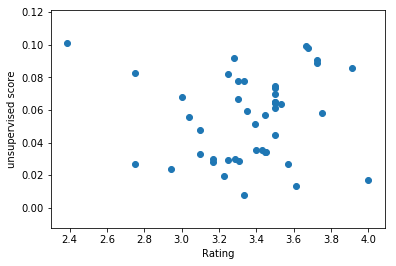

In [254]:
p = df_old_m.loc[df_old_m['rating'] > 2,]
plt.scatter(p['rating'],p['new_score'])
plt.xlabel('Rating')
plt.ylabel('unsupervised score')

In [255]:
df_old_m.ix[df_old_m['competitors'] == max(df_old_m['competitors']),]

,neighborhood,Manhattan,Unnamed: 0,lat,lng,subway,competitors,rating,review_count,price,rent,half-mile_sub_count,unsupervised_score,new_score
27,187,1,187,40.719389,-73.988512,13,11,3.673913,344.434783,1.347826,144.285,21,0.006337,0.097854


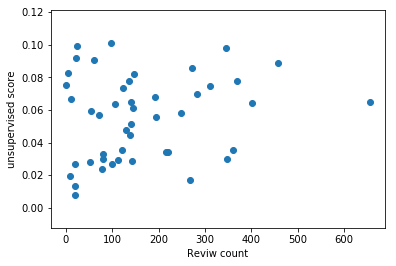

In [256]:
plt.scatter(df_old_m['review_count'],df_old_m['new_score'])
plt.xlabel('Reviw count')
plt.ylabel('unsupervised score')

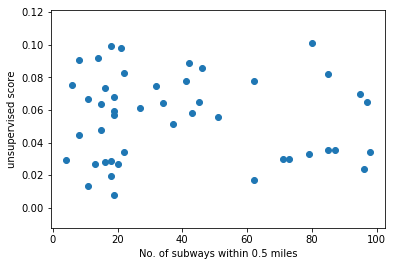

In [257]:
plt.scatter(df_old_m['half-mile_sub_count'],df_old_m['new_score'])
plt.xlabel('No. of subways within 0.5 miles')
plt.ylabel('unsupervised score')

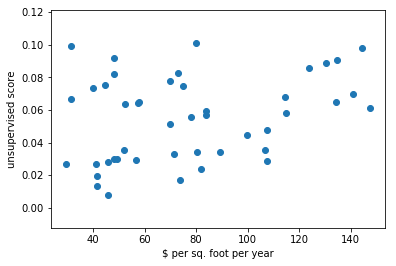

In [258]:
p = df_old_m.loc[df_old_m['rent']<200,]
plt.scatter(p['rent'],p['new_score'])
plt.xlabel('$ per sq. foot per year')
plt.ylabel('unsupervised score')

In [259]:
df_old_m['competitors'].describe()

count    46.000000
mean      2.760870
std       2.460215
min       0.000000
25%       1.000000
50%       2.000000
75%       4.000000
max      11.000000
Name: competitors, dtype: float64

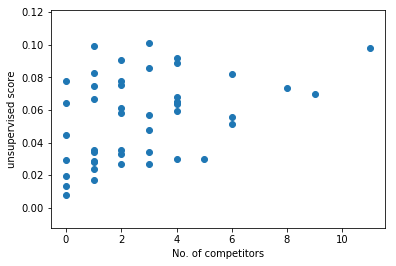

In [260]:
p = df_old_m.loc[df_old_m['competitors'] < 20,]

plt.scatter(p['competitors'],p['new_score'])
plt.xlabel('No. of competitors')
plt.ylabel('unsupervised score')

### ADDING SCORES AND SCORE RANKS FOR 3 WEIGHTING SCHEMES

In [185]:
scores_f = pd.read_csv('rank_df.csv')

In [186]:
scores_f.head()

,Unnamed: 0,Unnamed: 0.1,neighborhood,lat,lng,Manhattan,competitors,rating,review_count,rent,unsupervised_score,price,half-mile_sub_count,competitors_rank,half-mile_sub_count_rank,rent_rank,price_rank,unsupervised_score_rank,review_count_rank,rating_rank
0,2,2,2,40.774802,-73.959325,1,0.980392,0.766667,0.330335,0.715101,0.033941,0.240000,0.224490,16,30,22,32,42,43,43
1,6,6,6,40.724874,-73.995243,1,0.960784,0.833333,0.377477,0.625787,0.058375,0.100000,0.438776,28,43,23,33,34,10,45
2,13,13,13,40.821264,-73.953571,1,0.941176,0.793651,0.030270,0.923605,0.026746,0.600000,0.204082,9,26,28,2,33,21,25
3,15,15,15,40.756320,-73.983807,1,0.941176,0.765432,0.335535,0.745986,0.034413,0.377778,1.000000,39,8,9,18,21,35,10
4,29,29,29,40.706195,-74.012400,1,0.960784,0.688889,0.122409,0.777625,0.032687,0.400000,0.806122,37,35,8,13,24,34,24


In [187]:
scores_f.shape

(47, 20)

### 3 schemes:

- S1 equal weights = 1/6 for all

        w_rating = 1/6
        w_review = 1/6
        w_unsup = 1/6
        w_rent = 1/6
        w_sub = 1/6
        w_comp = 1/6

- S2: high connectivity and low rent:
       
        w_rating = 0
        w_review = 0
        w_unsup = 0.0
        w_rent = 0.5
        w_sub = 0.5
        w_comp = 0

- S3: low competition and low rent

        w_rating = 0
        w_review = 0
        w_unsup = 0.0
        w_rent = 0.5
        w_sub = 0.0
        w_comp = 0.5


- S4: high review and low competition

        w_rating = 0.0
        w_review = 0.5
        w_unsup = 0.0
        w_rent = 0.0
        w_sub = 0.0
        w_comp = 0.5

In [228]:
w_rating = 0
w_review = 0
w_unsup = 0.0
w_rent = 0.5
w_sub = 0.5
w_comp = 0

In [229]:
#scores_f['S1'] = scores_f['rating'] * w_rating + scores_f['review_count'] * w_review + scores_f['unsupervised_score'] * w_unsup + scores_f['rent'] * w_rent + scores_f['half-mile_sub_count'] * w_sub + scores_f['competitors'] * w_comp

In [230]:
scores_f['S2'] = scores_f['rating'] * w_rating + scores_f['review_count'] * w_review + scores_f['unsupervised_score'] * w_unsup + scores_f['rent'] * w_rent + scores_f['half-mile_sub_count'] * w_sub + scores_f['competitors'] * w_comp

In [219]:
import numpy as np

In [231]:
scores_f['S2_rank'] = np.argsort(scores_f['S2']) + 1

In [261]:
scores_f.to_csv('neighborhoods_with_ranks_all_schemes.csv')

In [232]:
scores_f['S1_rank'].describe()

count    47.000000
mean     24.000000
std      13.711309
min       1.000000
25%      12.500000
50%      24.000000
75%      35.500000
max      47.000000
Name: S1_rank, dtype: float64

In [233]:
scores_f[['neighborhood','S1_rank','S2_rank','S3_rank','S4_rank']].head(50)

,neighborhood,S1_rank,S2_rank,S3_rank,S4_rank
0,2,43,22,22,16
1,6,8,8,8,15
2,13,10,28,26,43
3,15,11,26,28,3
4,29,17,23,23,10
5,31,25,11,11,35
6,38,7,7,29,17
7,40,15,29,7,21
8,47,30,30,30,20
9,51,26,47,47,34


In [234]:
scores_f.head()

,Unnamed: 0,Unnamed: 0.1,neighborhood,lat,lng,Manhattan,competitors,rating,review_count,rent,...,review_count_rank,rating_rank,S1,S1_rank,S2,S2_rank,S3,S3_rank,S4,S4_rank
0,2,2,2,40.774802,-73.959325,1,0.980392,0.766667,0.330335,0.715101,...,43,43,0.508488,43,0.469795,22,0.382625,22,0.655364,16
1,6,6,6,40.724874,-73.995243,1,0.960784,0.833333,0.377477,0.625787,...,10,45,0.549089,8,0.532281,8,0.437500,8,0.669131,15
2,13,13,13,40.821264,-73.953571,1,0.941176,0.793651,0.030270,0.923605,...,21,25,0.486588,10,0.563843,28,0.456424,26,0.485723,43
3,15,15,15,40.756320,-73.983807,1,0.941176,0.765432,0.335535,0.745986,...,35,10,0.637091,11,0.872993,26,0.705277,28,0.638356,3
4,29,29,29,40.706195,-74.012400,1,0.960784,0.688889,0.122409,0.777625,...,34,24,0.564753,17,0.791874,23,0.640036,23,0.541596,10


In [235]:
g = scores_f[['neighborhood','S1','S1_rank','S2','S2_rank','S3','S3_rank','S4','S4_rank']]

In [242]:
#merge this with final_venues_with ranks

finni = fi.merge(g, left_on = 'neighborhood_id',right_on = 'neighborhood', how = 'left')

In [243]:
finni.head()

,Unnamed: 0_x,userId,venueId,venueCategoryId,venueCategory,latitude,longitude,neighborhood_id,Unnamed: 0_y,Unnamed: 0.1,...,rating_rank,neighborhood_y,S1,S1_rank,S2,S2_rank,S3,S3_rank,S4,S4_rank
0,0,470,49bbd6c0f964a520f4531fe3,4bf58dd8d48988d127951735,Arts & Crafts Store,40.719810,-74.002581,220,220.0,220.0,...,18.0,220,0.616138,46,0.700916,6,0.564168,12,0.694464,7
1,3,395,4bc7086715a7ef3bef9878da,4bf58dd8d48988d104941735,Medical Center,40.745164,-73.982519,264,264.0,264.0,...,16.0,264,0.543585,9,0.641685,45,0.526367,14,0.567635,33
2,4,87,4cf2c5321d18a143951b5cec,4bf58dd8d48988d1cb941735,Food Truck,40.740104,-73.989658,75,75.0,75.0,...,30.0,75,0.579869,23,0.761263,1,0.616147,43,0.582727,31
3,6,642,4ab966c3f964a5203c7f20e3,4bf58dd8d48988d1e0931735,Coffee Shop,40.751591,-73.974121,62,62.0,62.0,...,21.0,62,0.530619,47,0.637684,43,0.521321,17,0.588632,42
4,7,292,4d0cc47f903d37041864bf55,4bf58dd8d48988d12b951735,Bus Station,40.779422,-73.955341,261,261.0,261.0,...,34.0,261,0.488762,44,0.525059,18,0.434775,18,0.515519,46


In [244]:
finni.columns.values

array(['Unnamed: 0_x', 'userId', 'venueId', 'venueCategoryId',
       'venueCategory', 'latitude', 'longitude', 'neighborhood_id',
       'Unnamed: 0_y', 'Unnamed: 0.1', 'neighborhood_x', 'Manhattan',
       'competitors', 'rating', 'review_count', 'rent',
       'unsupervised_score', 'price', 'half-mile_sub_count',
       'competitors_rank', 'half-mile_sub_count_rank', 'rent_rank',
       'price_rank', 'unsupervised_score_rank', 'review_count_rank',
       'rating_rank', 'neighborhood_y', 'S1', 'S1_rank', 'S2', 'S2_rank',
       'S3', 'S3_rank', 'S4', 'S4_rank'], dtype=object)

In [246]:
finni = finni.drop(['neighborhood_y','neighborhood_x'], axis = 1)

In [247]:
finni.to_csv('final_venues_with_ranks_all_schemes.csv')

### Checking if locations are pareto optimal

In [262]:
import seaborn as sns

h = pd.read_csv('scoring_df_final.csv')

In [264]:
h = h.loc[h['Manhattan'] == 1,]

In [265]:
h.shape

(47, 12)

In [266]:
h.head()

,Unnamed: 0,neighborhood,lat,lng,Manhattan,competitors,rating,review_count,rent,unsupervised_score,price,half-mile_sub_count
2,2,2,40.774802,-73.959325,1,0.980392,0.766667,0.330335,0.715101,0.033941,0.240000,0.224490
6,6,6,40.724874,-73.995243,1,0.960784,0.833333,0.377477,0.625787,0.058375,0.100000,0.438776
13,13,13,40.821264,-73.953571,1,0.941176,0.793651,0.030270,0.923605,0.026746,0.600000,0.204082
15,15,15,40.756320,-73.983807,1,0.941176,0.765432,0.335535,0.745986,0.034413,0.377778,1.000000
29,29,29,40.706195,-74.012400,1,0.960784,0.688889,0.122409,0.777625,0.032687,0.400000,0.806122


In [267]:
h = h[['neighborhood','competitors','rating','review_count','rent','unsupervised_score','half-mile_sub_count']]

In [270]:
h = h.set_index('neighborhood')

In [271]:
h.head()

,competitors,rating,review_count,rent,unsupervised_score,half-mile_sub_count
neighborhood,,,,,,
2,0.980392,0.766667,0.330335,0.715101,0.033941,0.224490
6,0.960784,0.833333,0.377477,0.625787,0.058375,0.438776
13,0.941176,0.793651,0.030270,0.923605,0.026746,0.204082
15,0.941176,0.765432,0.335535,0.745986,0.034413,1.000000
29,0.960784,0.688889,0.122409,0.777625,0.032687,0.806122


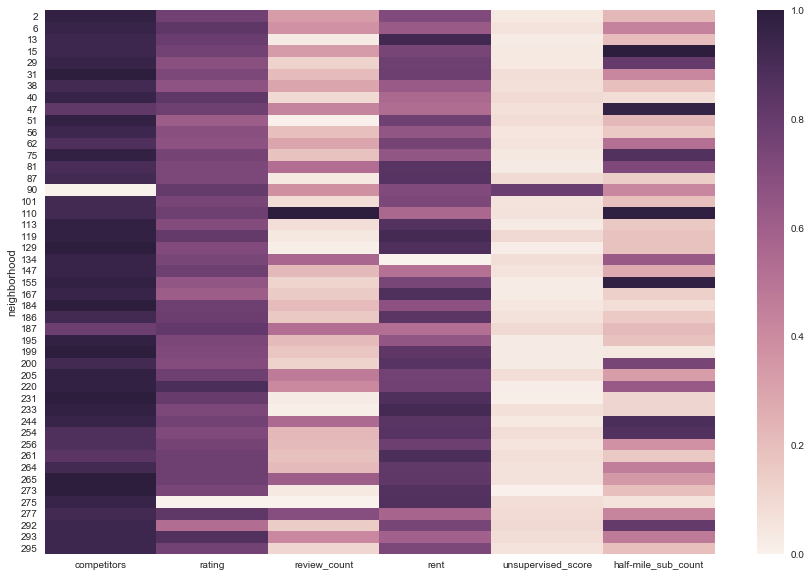

In [278]:
plt.figure(figsize = (15,10))
sns.heatmap(h)

high competition low rent

In [336]:
df_old_m.head()

,neighborhood,Manhattan,Unnamed: 0,lat,lng,subway,competitors,rating,review_count,price,rent,half-mile_sub_count,unsupervised_score,comp_bin,n_rent
0,2,1,2,40.774802,-73.959325,8,1,3.450000,216.700000,1.900000,89.332939,22,0.002198,1.0,75-100
1,6,1,6,40.724874,-73.995243,22,2,3.750000,247.625000,2.250000,114.987197,43,0.003781,1.0,100-125
2,13,1,13,40.821264,-73.953571,17,3,3.571429,19.857143,1.000000,29.443333,20,0.001732,1.0,25-50
3,15,1,15,40.756320,-73.983807,42,3,3.444444,220.111111,1.555556,80.461588,98,0.002229,1.0,75-100
4,29,1,29,40.706195,-74.012400,54,2,3.100000,80.300000,1.500000,71.373877,79,0.002117,1.0,50-75


In [337]:
a = df_old_m

In [339]:
a = a.loc[a['neighborhood'] !=90,]

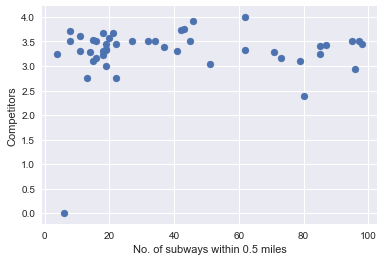

In [343]:
plt.scatter(a['half-mile_sub_count'], a['rating'])
plt.xlabel('No. of subways within 0.5 miles')
plt.ylabel('Competitors')

In [322]:
g = df_old_m

In [323]:
g.shape

(47, 15)

In [324]:
g = g[['neighborhood','competitors','rating','review_count','rent','unsupervised_score','half-mile_sub_count']]

In [325]:
g= g.set_index('neighborhood')

In [326]:
g.columns.values

array(['competitors', 'rating', 'review_count', 'rent',
       'unsupervised_score', 'half-mile_sub_count'], dtype=object)

In [327]:
for i in g.columns.values:
    g[i+'_norm'] = g[i]/sum(g[i])

In [330]:
l = ['competitors','rating','review_count','rent','unsupervised_score','half-mile_sub_count']
ll = []
for i in l:
    ll.append(i+'_norm')
    

In [331]:
o = g[ll]

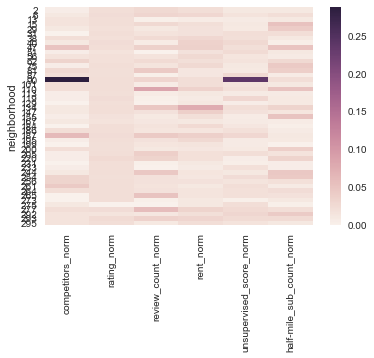

In [332]:
sns.heatmap(o)

KeyError: 0

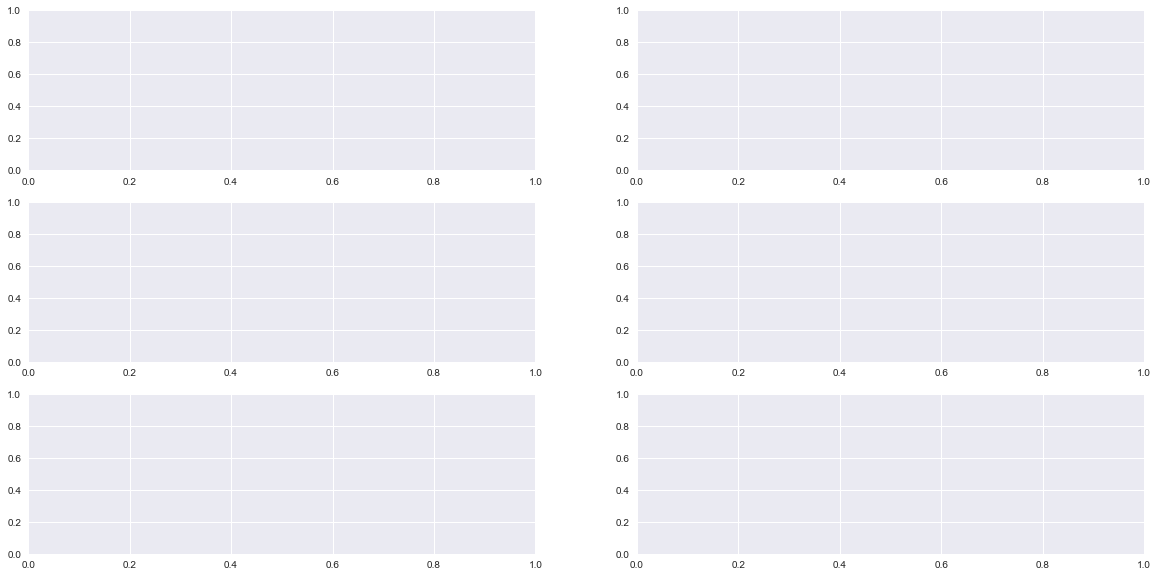

In [335]:
from scipy import stats
fig, axes = plt.subplots(3, 2, figsize=(20, 10))
X_bc = []
for i, ax in enumerate(axes.ravel()):
    if i > 6:
        ax.set_visible(False)
        continue
    x, lambda_x = stats.boxcox(o[i] + 1e-5)
    X_bc.append(x)
    ax.hist(x, bins="auto")
    ax.set_title("{}: {} {:.2f}".format(i, boston.feature_names[i], lambda_x))

In [344]:
u = pd.read_csv('scoring_df_final.csv')

In [345]:
u.head()

,Unnamed: 0,neighborhood,lat,lng,Manhattan,competitors,rating,review_count,rent,unsupervised_score,price,half-mile_sub_count
0,0,0,40.765887,-74.165511,0,0.980392,0.000000,0.000000,0.818188,0.063832,1.00,0.000000
1,1,1,40.662722,-73.908039,0,0.980392,0.000000,0.000000,0.885175,0.262769,1.00,0.091837
2,2,2,40.774802,-73.959325,1,0.980392,0.766667,0.330335,0.715101,0.033941,0.24,0.224490
3,3,3,40.785104,-73.794881,0,0.980392,0.000000,0.000000,0.891074,0.048555,1.00,0.000000
4,4,4,40.936005,-74.063185,0,1.000000,0.000000,0.000000,0.761531,0.024103,1.00,0.000000


In [350]:
u = u.loc[u['neighborhood'] != 90,]
u = u.loc[u['competitors'] != min(u['competitors']),]

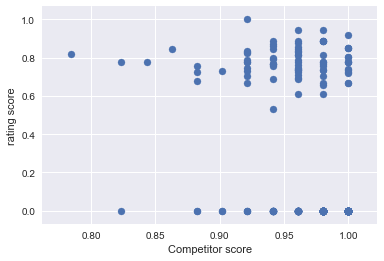

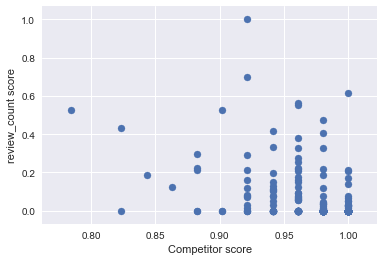

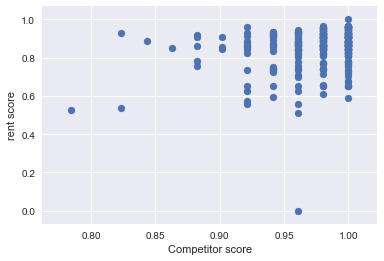

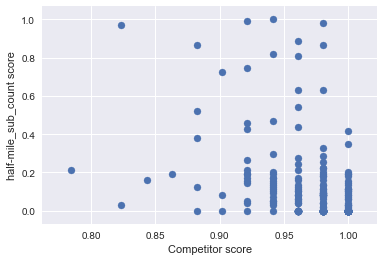

In [352]:
for i in ['rating','review_count','rent','half-mile_sub_count']:

    plt.figure()
    plt.scatter(u['competitors'], u[i])
    plt.xlabel('Competitor score')
    plt.ylabel(i + ' score')